# Data Pre-Processing & Feature Engineering

Based on EDA we have got following information on Market and News Data

### Market Data

- There are no significant missing values in the datset. However, there are 269 distinct asset codes with no asset names. Therefore market data with news data on asset name can cause problems
- Volume has the highest correlation to the response variable i.e. returnsOpenNextMktres10
- Closing Price of stock at one day is not same as Opening Price of next day. It suggests that we might have potential outliers incase the the difference between the two is very high.
- Mostly null data comes from market adjusted columns. We might need to fill them up with some values.
- Returns should not take extremely higher values. If it does, it is either noise, or extreme data that will confuse our prediction later on. We might need to remove these extreme data.

### News Data

- Unlike Market Data, we do not have 'Unknown' asset names in News Data.
- We find missing values in Headline. We would like to remove these rows, since prediction is impossible.
- Some news are delayed which is calculated by taking difference between firstCreated and time. We might like to get rid of such articles.
- There are almost negligible news articles with Urgency code equals 2

Based on above findings, we do following Data Pre-processings.

# Part A: Data Pre-Processing

## 1. Market Data

#### Load Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("market_train1.csv")
df2 = pd.read_csv("market_train2.csv")
df3 = pd.read_csv("market_train3.csv")
df4 = pd.read_csv("market_train4.csv")
df5 = pd.read_csv("market_train5.csv")
market_data = pd.concat([df1,df2,df3,df4,df5])

In [3]:
market_data = market_data.drop(market_data.columns[0], axis=1)

In [4]:
market_data['time'] = pd.to_datetime(market_data['time'])
market_data['assetName'] = market_data['assetName'].astype('category')

### 1.1 Outliers - Open to close: 
Clip rows where difference between close price on one day and open price on next day is more than 50% 

In [5]:
market_data['close_open_ratio'] = np.abs(market_data['close']/market_data['open'])
threshold = 0.5
print('In %i lines price increases by 50%% or more in a day' %(market_data['close_open_ratio']>=1.5).sum())
print('In %i lines price decreases by 50%% or more in a day' %(market_data['close_open_ratio']<=0.5).sum())
market_data['close_open_ratio'] = market_data['close_open_ratio'].clip(lower=0.5,upper=1.5)
market_data['close'] = market_data['open']*market_data['close_open_ratio']

In 83 lines price increases by 50% or more in a day
In 16 lines price decreases by 50% or more in a day


### 1.2 Fill nulls - Market values:
Fill null data in market adjusted columns with the raw values in the same row.

In [6]:
column_market = ['returnsClosePrevMktres1','returnsOpenPrevMktres1','returnsClosePrevMktres10', 'returnsOpenPrevMktres10']
column_raw = ['returnsClosePrevRaw1', 'returnsOpenPrevRaw1','returnsClosePrevRaw10', 'returnsOpenPrevRaw10']
for i in range(len(column_raw)):
    market_data[column_market[i]] = market_data[column_market[i]].fillna(market_data[column_raw[i]])

#### 1.3 Outliers-Returns:  
Stock with returns exceeding above 50% or falling below 50% needs to be removed

In [7]:
column_return = column_market + column_raw
orig_len = market_data.shape[0]
for column in column_return:
    market_data = market_data.loc[market_data[column]>-50]
    market_data = market_data.loc[market_data[column]<50]
new_len = market_data.shape[0]
rmv_len = np.abs(orig_len-new_len)
print('There were %i lines removed' %rmv_len)

There were 246 lines removed


In [8]:
market_data.columns

Index(['time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe', 'close_open_ratio'],
      dtype='object')

In [9]:
market_data = market_data[['time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe', 'close_open_ratio']]

In [10]:
market_data.shape

(4072709, 14)

# 2. News Data 

#### Load Data

In [11]:
df1 = pd.read_csv("news_train1.csv")

In [12]:
df2 = pd.read_csv("news_train2.csv")

In [13]:
df3 = pd.read_csv("news_train3.csv")

In [14]:
df4 = pd.read_csv("news_train4.csv")

In [15]:
df5 = pd.read_csv("news_train5.csv")

In [16]:
df6 = pd.read_csv("news_train6.csv")

In [17]:
df7 = pd.read_csv("news_train7.csv")

In [18]:
df8 = pd.read_csv("news_train8.csv")

In [19]:
df9 = pd.read_csv("news_train9.csv")

In [20]:
df10 = pd.read_csv("news_train10.csv")

In [21]:
news_data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])

In [22]:
news_data.dtypes

Unnamed: 0                int64
time                     object
sourceTimestamp          object
firstCreated             object
sourceId                 object
headline                 object
urgency                   int64
takeSequence              int64
provider                 object
subjects                 object
audiences                object
bodySize                  int64
companyCount              int64
headlineTag              object
marketCommentary           bool
sentenceCount             int64
wordCount                 int64
assetCodes               object
assetName                object
firstMentionSentence      int64
relevance               float64
sentimentClass            int64
sentimentNegative       float64
sentimentNeutral        float64
sentimentPositive       float64
sentimentWordCount        int64
noveltyCount12H           int64
noveltyCount24H           int64
noveltyCount3D            int64
noveltyCount5D            int64
noveltyCount7D            int64
volumeCo

In [23]:
news_data = news_data.drop(news_data.columns[0], axis=1)

In [24]:
news_data = news_data[['time', 'sourceTimestamp', 'firstCreated', 'sourceId', 'headline',
       'urgency', 'takeSequence', 'provider', 'subjects', 'audiences',
       'bodySize', 'companyCount', 'headlineTag',
       'sentenceCount', 'wordCount', 'assetCodes', 'assetName',
       'firstMentionSentence', 'relevance', 'sentimentClass',
       'sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
       'sentimentWordCount', 'noveltyCount12H', 'noveltyCount24H',
       'volumeCounts12H',
       'volumeCounts24H']]

In [25]:
news_data.shape

(9328749, 28)

In [26]:
news_data['time'] = pd.to_datetime(news_data['time'])
news_data['sourceTimestamp'] = pd.to_datetime(news_data['sourceTimestamp'])
news_data['firstCreated'] = pd.to_datetime(news_data['firstCreated'])
news_data['provider'] = news_data['provider'].astype('category')
news_data['subjects'] = news_data['subjects'].astype('category')
news_data['audiences'] = news_data['audiences'].astype('category')
news_data['assetCodes'] = news_data['assetCodes'].astype('category')
news_data['assetName'] = news_data['assetName'].astype('category')
news_data['urgency'] = news_data['urgency'].astype('category')
#news_data['takeSequence'] = news_data['takeSequence'].astype('category')
#news_data['firstMentionSentence'] = news_data['firstMentionSentence'].astype('category')

### 2.1 Blank Headlines

We remove rows with blank headlines from the news data

In [27]:
orig_len = news_data.shape[0]
news_data = news_data[pd.notnull(news_data['headline'])]
new_len = news_data.shape[0]
rmv_len = np.abs(orig_len-new_len)
print('There were %i lines removed' %rmv_len)

There were 73960 lines removed


### 2.2 Delayed news items

We remove rows where delay in news article is more than 1

In [28]:
orig_len = news_data.shape[0]
news_data['news_delay'] = news_data['time'] - news_data['sourceTimestamp']
news_data = news_data[news_data.news_delay < datetime.timedelta(days=1)]
new_len = news_data.shape[0]
rmv_len = np.abs(orig_len-new_len)
print('There were %i lines removed' %rmv_len)

There were 4 lines removed


### 2.3 Remove Outliers

In [29]:
# Function to remove outliers
def remove_outliers(data_frame, column_list, low=0.02, high=0.98):
    temp_frame = data_frame
    for column in column_list:
        this_column = data_frame[column]
        quant_df = this_column.quantile([low,high])
        low_limit = quant_df[low]
        high_limit = quant_df[high]
        temp_frame[column] = data_frame[column].clip(lower=low_limit, upper=high_limit)
    return temp_frame

In [30]:
# Remove outlier
# columns_outlier = ['bodySize', 'sentenceCount', 'wordCount', 'sentimentWordCount','noveltyCount12H',\
#                   'noveltyCount24H', 'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H', 'volumeCounts24H',\
#                   'volumeCounts3D','volumeCounts5D','volumeCounts7D']
columns_outlier = ['bodySize', 'sentenceCount', 'wordCount', 'sentimentWordCount','noveltyCount12H',\
                  'noveltyCount24H', 'volumeCounts12H', 'volumeCounts24H',\
                  ]
news_data = remove_outliers(news_data, columns_outlier)

In [31]:
news_data.shape

(9254785, 29)

# Part B: Feature Engineering

## Data Sampling

In [32]:
#sampling = True
sampling = False

In [33]:
if sampling:
    #market_train_df = market_data.tail(100_000)
    #news_train_df = news_data.tail(200_000)
    market_train_df = market_data.tail(40_000)
    news_train_df = news_data.tail(100_000)
else:
    market_train_df = market_data
    news_train_df = news_data

In [34]:
market_train_df['dat'] = market_train_df.time.dt.date

In [35]:
market_train_df = market_train_df[(market_train_df['dat']>=datetime.date(2013,1,1)) & (market_train_df['dat']<=datetime.date(2016,12,31))]

In [36]:
news_train_df = news_train_df[(news_train_df['firstCreated'] >= datetime.date(2013,1,1)) & (news_train_df['firstCreated']<=datetime.date(2016,12,31))]

C:\Users\RaviSingh\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [37]:
market_train_df.shape

(1718491, 15)

In [38]:
news_train_df.shape

(4053316, 29)

## Data Pre-Processing Function

In [39]:
def market_quant_feats(market_df):
    
    # get moving average
    def moving_avg(X, feat1):
        X[feat1 + '_MA_7MA'] = X[feat1].rolling(window=7).mean()
        X[feat1 + '_MA_15MA'] = X[feat1].rolling(window=15).mean()
        X[feat1 + '_MA_30MA'] = X[feat1].rolling(window=30).mean()
        X[feat1 + '_MA_60MA'] = X[feat1].rolling(window=60).mean()
        return X
        
    # get moving standard deviation
    def moving_std(X, feat1):
        #X[feat1 + '_MA_1std'] = X[feat1].rolling(window=1).std()
        X[feat1 + '_MA_3std'] = X[feat1].rolling(window=3).std()
        X[feat1 + '_MA_5std'] = X[feat1].rolling(window=5).std()
        return X
        
    market_df = moving_avg(market_df, 'close')
    market_df = moving_avg(market_df, 'volume')
    market_df = moving_std(market_df, 'volume')
    
    # bollinger band
    no_of_std = 2
    market_df['MA_7MA'] = market_df['close'].rolling(window=7).mean()
    market_df['MA_7MA_std'] = market_df['close'].rolling(window=7).std() 
    market_df['MA_7MA_BB_high'] = market_df['MA_7MA'] + no_of_std * market_df['MA_7MA_std']
    market_df['MA_7MA_BB_low'] = market_df['MA_7MA'] - no_of_std * market_df['MA_7MA_std']
    market_df['MA_15MA'] = market_df['close'].rolling(window=15).mean()
    market_df['MA_15MA_std'] = market_df['close'].rolling(window=15).std() 
    market_df['MA_15MA_BB_high'] = market_df['MA_15MA'] + no_of_std * market_df['MA_15MA_std']
    market_df['MA_15MA_BB_low'] = market_df['MA_15MA'] - no_of_std * market_df['MA_15MA_std']
    market_df['MA_30MA'] = market_df['close'].rolling(window=30).mean()
    market_df['MA_30MA_std'] = market_df['close'].rolling(window=30).std() 
    market_df['MA_30MA_BB_high'] = market_df['MA_30MA'] + no_of_std * market_df['MA_30MA_std']
    market_df['MA_30MA_BB_low'] = market_df['MA_30MA'] - no_of_std * market_df['MA_30MA_std']
    
    # Adding daily difference
    new_col = market_df["close"] - market_df["open"]
    market_df.insert(loc=6, column="daily_diff", value=new_col)
    market_df['close_to_open'] =  np.abs(market_df['close'] / market_df['open'])
    
    return market_df

In [40]:
pd.options.mode.chained_assignment = None
market_train_df = market_quant_feats(market_train_df)

In [75]:
news_train_df['assetCodes'].head()

275248      {'DF.N'}
275249     {'YUM.N'}
275250    {'KRFT.O'}
275251    {'SGOL.P'}
275252     {'BAC.N'}
Name: assetCodes, dtype: category
Categories (10691, object): [{'000030.KS', 'WF.N'}, {'005490.KS', 'PKX.N'}, {'017670.KS', 'SKM.N'}, {'034220.KS', 'LPL.N'}, ..., {'ZX.N'}, {'ZYNE.OQ', 'ZYNE.O'}, {'ZZ.N', 'ZZC.N'}, {'ZZ.N'}]

In [39]:
news_train_df['time'] = pd.to_datetime(news_train_df['time'])
news_train_df['sourceTimestamp'] = pd.to_datetime(news_train_df['sourceTimestamp'])
news_train_df['firstCreated'] = pd.to_datetime(news_train_df['firstCreated'])
news_train_df['urgency'] = news_train_df['urgency'].astype('int64')
#news_train_df['assetCodes'] = news_train_df['assetCodes'].astype('category')

C:\Users\RaviSingh\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\RaviSingh\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RaviSingh\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [40]:
# Data processing function
from itertools import chain
head_line_tag_dict = {k: v for v, k in enumerate(news_train_df['headlineTag'].unique())}
asset_code_dict = {k: v for v, k in enumerate(market_train_df['assetCode'].unique())}
def data_prep(market_df,news_df, head_line_tag_dict, asset_code_dict):
    market_df['date'] = market_df.time.dt.date
    market_df['close_to_open'] = market_df['close'] / market_df['open']
    market_df['average price'] = (market_df['close'] + market_df['open'])/2
    market_df['pricevolume'] = market_df['volume'] * market_df['close']
    
    news_df['time'] = news_df.time.dt.hour
    news_df['sourceTimestamp']= news_df.sourceTimestamp.dt.hour
    news_df['firstCreated'] = news_df.firstCreated.dt.date
    news_df['headlineLen'] = news_df['headline'].apply(lambda x: len(x))
    news_df['asset_sentiment_count'] = news_df.groupby(['assetName', 'sentimentClass'])['time'].transform('count')
    news_df['asset_sentence_mean'] = news_df.groupby(['assetName', 'sentenceCount'])['time'].transform('mean')
    news_df['len_audiences'] = news_df['audiences'].map(lambda x: len(eval(x)))
    news_df['position'] = news_df['firstMentionSentence'] / news_df['sentenceCount']
    news_df['coverage'] = news_df['sentimentWordCount'] / news_df['wordCount']
    
    news_cols_agg = {
        'headlineLen' : ['sum'],
        'asset_sentiment_count' : ['sum'],
        'asset_sentence_mean' : ['mean'],
        'len_audiences' : ['sum','mean'],
        'position' : ['mean'],
        'coverage' : ['sum','mean'],
        'urgency': ['min', 'count'],
        'takeSequence': ['max'],
        'bodySize': ['min', 'max', 'mean', 'std'],
        'wordCount': ['min', 'max', 'mean', 'std'],
        'sentenceCount': ['min', 'max', 'mean', 'std'],
        'companyCount': ['min', 'max', 'mean', 'std'],
        'relevance': ['min', 'max', 'mean', 'std'],
        'sentimentNegative': ['min', 'max', 'mean', 'std'],
        'sentimentNeutral': ['min', 'max', 'mean', 'std'],
        'sentimentPositive': ['min', 'max', 'mean', 'std'],
        'sentimentWordCount': ['min', 'max', 'mean', 'std'],
        'noveltyCount24H': ['min', 'max', 'mean', 'std'],
        'volumeCounts24H': ['min', 'max', 'mean', 'std']

            }
    

    news_df['assetCodes'] = news_df['assetCodes'].str.findall(f"'([\w\./]+)'")    
    
    # Expand assetCodes
    assetCodes_expanded = list(chain(*news_df['assetCodes']))
    assetCodes_index = news_df.index.repeat( news_df['assetCodes'].apply(len) )

    assert len(assetCodes_index) == len(assetCodes_expanded)
    df_assetCodes = pd.DataFrame({'level_0': assetCodes_index, 'assetCode': assetCodes_expanded})

    # Create expandaded news (will repeat every assetCodes' row)
    news_cols = ['firstCreated', 'assetCodes'] + sorted(news_cols_agg.keys())
    news_df_expanded = pd.merge(df_assetCodes, news_df[news_cols], left_on='level_0', right_index=True, suffixes=(['','_old']))

    # Free memory
    del news_df, df_assetCodes

    # Aggregate numerical news features
    news_df_aggregated = news_df_expanded.groupby(['firstCreated', 'assetCode']).agg(news_cols_agg).reset_index()
    
    # Free memory
    del news_df_expanded


    news_df_aggregated.columns = ['_'.join(col).strip() for col in news_df_aggregated.columns.values]

    
    market_df = pd.merge(market_df, news_df_aggregated, how='left', left_on=['date', 'assetCode'], right_on=['firstCreated_', 'assetCode_'])
    market_df['assetCodeT'] = market_df['assetCode'].map(asset_code_dict)
    
    market_df = market_df.dropna(axis=0)
    
    return market_df

In [41]:
pd.options.mode.chained_assignment = None  # default='warn'
prep_data = data_prep(market_train_df, news_train_df, head_line_tag_dict, asset_code_dict)
prep_data.head()

,time,assetCode,assetName,volume,close,open,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsClosePrevMktres10,...,sentimentWordCount_std,noveltyCount24H_min,noveltyCount24H_max,noveltyCount24H_mean,noveltyCount24H_std,volumeCounts24H_min,volumeCounts24H_max,volumeCounts24H_mean,volumeCounts24H_std,assetCodeT
0,2013-01-02 22:00:00,A.N,Agilent Technologies Inc,6290038.0,41.88,42.17,-0.011745,0.028649,0.030503,0.001360,...,310.943199,0.0,2.0,0.222222,0.548319,0.0,15.0,2.277778,3.922867,0
1,2013-01-02 22:00:00,AAN.N,Aaron's Inc,463556.0,28.70,28.72,-0.003633,0.058916,0.021716,0.010621,...,7.071068,0.0,0.0,0.000000,0.000000,0.0,1.0,0.500000,0.707107,1
3,2013-01-02 22:00:00,AAPL.O,Apple Inc,20017838.0,549.03,554.00,-0.011501,0.051464,0.058208,0.011897,...,200.647145,0.0,8.0,1.505882,1.991790,0.0,47.0,15.341176,14.808743,3
6,2013-01-02 22:00:00,ABB.N,ABB Ltd,2097157.0,21.19,21.21,0.003721,0.021242,0.034163,0.008140,...,253.520694,0.0,3.0,0.764706,0.986540,0.0,31.0,4.176471,5.675415,6
7,2013-01-02 22:00:00,ABC.N,AmerisourceBergen Corp,1972401.0,43.49,43.59,-0.003538,0.010152,-0.006624,-0.023833,...,88.928810,0.0,1.0,0.333333,0.577350,0.0,2.0,1.000000,1.000000,7


In [42]:
prep_data.columns

Index(['time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsClosePrevMktres10',
       'returnsOpenPrevMktres10', 'returnsOpenNextMktres10', 'universe',
       'close_open_ratio', 'dat', 'date', 'close_to_open', 'average price',
       'pricevolume', 'firstCreated_', 'assetCode_', 'headlineLen_sum',
       'asset_sentiment_count_sum', 'asset_sentence_mean_mean',
       'len_audiences_sum', 'len_audiences_mean', 'position_mean',
       'coverage_sum', 'coverage_mean', 'urgency_min', 'urgency_count',
       'takeSequence_max', 'bodySize_min', 'bodySize_max', 'bodySize_mean',
       'bodySize_std', 'wordCount_min', 'wordCount_max', 'wordCount_mean',
       'wordCount_std', 'sentenceCount_min', 'sentenceCount_max',
       'sentenceCount_mean', 'sentenceCount_std', 'companyCount_min',
       'companyCount_max', 'companyCount_mean', 'companyCount_std',
       'relevance_min', 'relevanc

In [43]:
prep_data.shape

(837654, 77)

Text(0.5,1,'Pair-wise correlation')

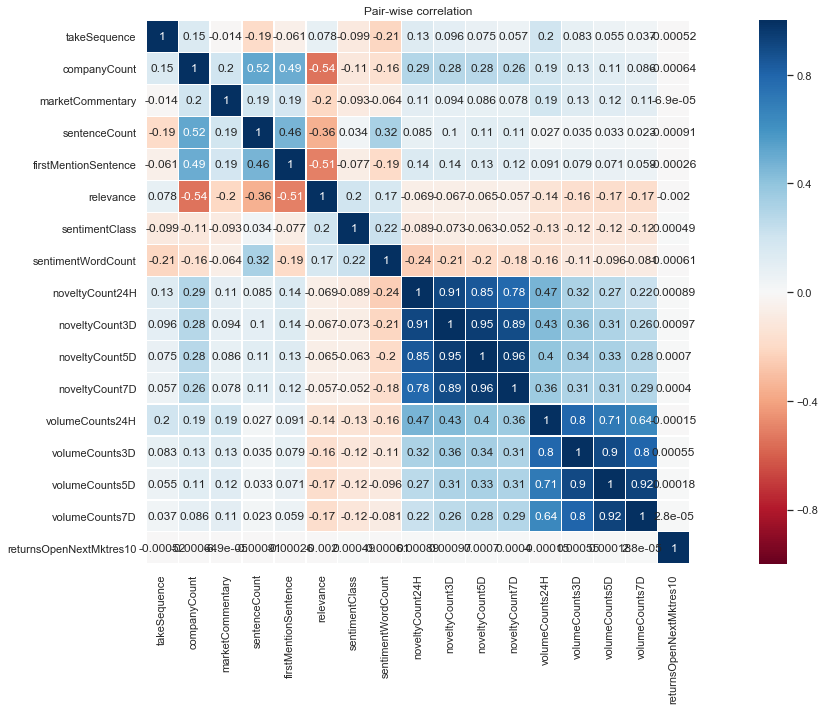

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

columns_corr = ['takeSequence', 'companyCount','marketCommentary','sentenceCount',\
           'firstMentionSentence','relevance','sentimentClass','sentimentWordCount','noveltyCount24H',\
           'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D','volumeCounts24H','volumeCounts3D','volumeCounts5D','volumeCounts7D','returnsOpenNextMktres10']
colormap = plt.cm.RdBu
plt.figure(figsize=(25,10))
sns.heatmap(prep_data[columns_corr].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('Pair-wise correlation')


## Data Selection

Looking at the statistics, most data behave homogeneously after 2009 (volume increase, price increase, etc.). However, before 2009, due to the burst of the housing bubble that leads to the financial crisis in 2008, the data behaves differently. So the question to make the right prediction for this problem is: Will there be a financial crisis in the next 6 months? If the answer is Yes, then we include data before 2009. If the answer is No, then we exclude them.

In this notebook, I choose No as the answer and proceed from that.

In [44]:
train_data = prep_data[(prep_data['date']>=datetime.date(2013,1,1)) & (prep_data['date']<=datetime.date(2015,12,31))]

In [45]:
val_data = prep_data[(prep_data['date']>=datetime.date(2016,1,1)) & (prep_data['date']<=datetime.date(2017,1,1))]

In [46]:
train_data.shape

(627772, 77)

## Feature Selection

We then perform feature selection . Feature scaling is not needed since we plan to use lightgbm - a tree-based model, which do not require standardization.

We convert this problem into a classification problem: 0 for negative return and 1 for positive return

In [47]:
feature_columns = [c for c in train_data if c not in ['assetCode','firstCreated_', 'assetCodes','assetCode_', 'assetName_x', 'assetName_y', 'audiences', 'firstCreated', 'headline',\
                                                       'headlineTag','marketCommentary','provider','returnsOpenNextMktres10','sourceId','subjects',\
                                                       'time', 'date','news_delay','assetName','assetName_y','index','assetCodeT','dat']]
print("SELECTED FEATURES: ", feature_columns)

# Extract X and Y
X_train = train_data[feature_columns].values
up_train = train_data['returnsOpenNextMktres10'].map(lambda x: 0 if x<0 else 1).values
r_train = train_data['returnsOpenNextMktres10'].values
Y_train= up_train

X_val = val_data[feature_columns].values
up_val = val_data['returnsOpenNextMktres10'].map(lambda x: 0 if x<0 else 1).values
r_val = val_data['returnsOpenNextMktres10'].values
Y_val= up_val

num_sample = Y_train.shape[0]
#print('Number of samples: ', num_sample)

SELECTED FEATURES:  ['volume', 'close', 'open', 'returnsClosePrevMktres1', 'returnsOpenPrevMktres1', 'returnsClosePrevRaw10', 'returnsClosePrevMktres10', 'returnsOpenPrevMktres10', 'universe', 'close_open_ratio', 'close_to_open', 'average price', 'pricevolume', 'headlineLen_sum', 'asset_sentiment_count_sum', 'asset_sentence_mean_mean', 'len_audiences_sum', 'len_audiences_mean', 'position_mean', 'coverage_sum', 'coverage_mean', 'urgency_min', 'urgency_count', 'takeSequence_max', 'bodySize_min', 'bodySize_max', 'bodySize_mean', 'bodySize_std', 'wordCount_min', 'wordCount_max', 'wordCount_mean', 'wordCount_std', 'sentenceCount_min', 'sentenceCount_max', 'sentenceCount_mean', 'sentenceCount_std', 'companyCount_min', 'companyCount_max', 'companyCount_mean', 'companyCount_std', 'relevance_min', 'relevance_max', 'relevance_mean', 'relevance_std', 'sentimentNegative_min', 'sentimentNegative_max', 'sentimentNegative_mean', 'sentimentNegative_std', 'sentimentNeutral_min', 'sentimentNeutral_max',

In [48]:
X_train[0]

array([ 6.29003800e+06,  4.18800000e+01,  4.21700000e+01, -1.17446418e-02,
        2.86489620e-02,  3.05025092e-02,  1.36001405e-03,  4.75933524e-02,
        1.00000000e+00,  9.93123073e-01,  9.93123073e-01,  4.20250000e+01,
        2.63426791e+08,  1.74500000e+03,  1.23640000e+04,  1.47677953e+01,
        5.50000000e+01,  3.05555556e+00,  5.62897435e-01,  1.49680328e+01,
        8.31557378e-01,  1.00000000e+00,  1.80000000e+01,  9.00000000e+00,
        0.00000000e+00,  8.63200000e+03,  2.21722222e+03,  3.35363874e+03,
        9.00000000e+00,  1.47300000e+03,  3.81222222e+02,  5.47163332e+02,
        1.00000000e+00,  5.90000000e+01,  1.35000000e+01,  1.89837392e+01,
        1.00000000e+00,  4.10000000e+01,  4.05555556e+00,  9.49595717e+00,
        6.65190000e-02,  1.00000000e+00,  9.01156778e-01,  2.88069692e-01,
        8.90408000e-03,  8.13827000e-01,  2.21239666e-01,  2.77958329e-01,
        1.15508000e-01,  9.26513000e-01,  4.10133778e-01,  2.91071188e-01,
        4.37422000e-02,  

## Data Splitting

To avoid leaking of data, we split training and validation set in chronological order instead of random splitting.

In [49]:
#train_ratio = 0.7
#test_ratio = 0.3
#index_split = int(num_sample*train_ratio)
#X_train = X[:index_split,:]
#X_val = X[index_split:,:]
#Y_train = Y[:index_split]
#Y_val = Y[index_split:]

In [50]:
sum(Y_train)/len(Y_train)
#sum(Y_val)/len(Y_val)

0.49265179077754345

# Building Model

We will build lightGBM model as our first attempt

In [61]:
import random
random.seed(1)
import time

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import get_scorer
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
from sklearn.externals.joblib import Parallel, delayed
from sklearn.base import clone

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## Model - XGBoost

### Parameter Tuning

In [53]:
# Set up decay learning rate
def learning_rate_power(current_round):
    base_learning_rate = 0.1
    min_learning_rate = 0.01
    lr = base_learning_rate * np.power(0.995,current_round)
    return max(lr, min_learning_rate)

In [54]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

tune_params = {'n_estimators': [500,1000],
              'max_depth': [5,10],
              'colsample_bytree':[0.6,0.8],
              'min_child_weight': [5, 10],
              'gamma': [0.5,1.5],
              'reg_lambda':[1e-3,1e-1],
               'reg_alpha':[1e-3, 1e-1],
              'learning_rate':[0.1,0.01]}

fit_params = {'early_stopping_rounds':100,
              'eval_metric': 'auc',
              'eval_set': [(X_train, Y_train), (X_val, Y_val)],
              'verbose': 200
              }

In [264]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',silent=True, nthread=1)

folds = 5
param_comb = 40

#skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

rs = RandomizedSearchCV(xgb_clf, param_distributions=tune_params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv = tscv.split(X_train), verbose=3, random_state=1001 )


In [142]:
#rs.fit(X_train, Y_train, **fit_params)

In [150]:
rs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8326070504077219, gamma=2, learning_rate=0.1,
       max_delta_step=0, max_depth=14, min_child_weight=10, missing=None,
       n_estimators=1000, n_jobs=1, nthread=1, objective='binary:logistic',
       random_state=0, reg_alpha=1, reg_lambda=0.1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

### Building Model on best estimated parameters

In [55]:
xgb_clf = xgb.XGBClassifier(n_jobs=4,
                             objective='binary:logistic',
                            random_state=300)
opt_params = {'n_estimators': 5000,
              'max_depth': 8,
              'subsample':0.7,
              'colsample_bytree':0.8,
              'min_child_weight': 10,
              'gamma': 2,
              'reg_lambda':1,
               'reg_alpha':2,
              'learning_rate':0.01}
xgb_clf.set_params(**opt_params)
xgb_clf.fit(X_train, Y_train,**fit_params)

[0]	validation_0-auc:0.571454	validation_1-auc:0.542477
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[200]	validation_0-auc:0.604614	validation_1-auc:0.552326
Stopping. Best iteration:
[122]	validation_0-auc:0.598383	validation_1-auc:0.552443



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=2, learning_rate=0.01, max_delta_step=0,
       max_depth=8, min_child_weight=10, missing=None, n_estimators=5000,
       n_jobs=4, nthread=None, objective='binary:logistic',
       random_state=300, reg_alpha=2, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

### Accuracies on Training and Validation set

In [56]:
print('Training accuracy: ', accuracy_score(Y_train, xgb_clf.predict(X_train)))
print('Validation accuracy: ', accuracy_score(Y_val, xgb_clf.predict(X_val)))

Training accuracy:  0.5694886041429054
Validation accuracy:  0.5371446812971098


In [57]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1
    return(TP, FP, TN, FN)

In [58]:
(TP,FP,TN,FN) = perf_measure(Y_train, xgb_clf.predict(X_train))
#confusion_matrix(Y_train, lgb_clf.predict(X_train))
TNR = TN/(TN+FP)
TPR = TP/(TP+FN)
print(TPR*100)
print(TNR*100)

56.46435349998221
57.419332556774116


In [59]:
(TP,FP,TN,FN)

(174629, 135619, 182880, 134644)

## Visualizing Result

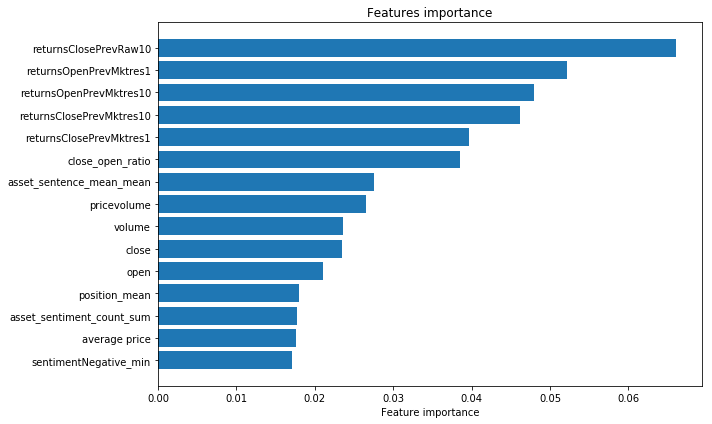

In [60]:
features_imp = pd.DataFrame()
features_imp['features'] = list(feature_columns)[:]
features_imp['importance'] = xgb_clf.feature_importances_
features_imp = features_imp.sort_values(by='importance', ascending=False).reset_index()

y = -np.arange(15)
plt.figure(figsize=(10,6))
plt.barh(y, features_imp.loc[:14,'importance'].values)
plt.yticks(y,(features_imp.loc[:14,'features']))
plt.xlabel('Feature importance')
plt.title('Features importance')
plt.tight_layout()